<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the median for each of the 4 size columns
*  calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
# Read csv file and save the dataframe to a variable
iris_data = pd.read_csv(url, names=names)
display(iris_data)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
print(iris_data.shape)
print(iris_data.info())
print(type(iris_data))
print("any null values ? = " ,iris_data.isnull().values.any())
iris_data.isnull().sum()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
any null values ? =  False


sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [ ]:
# data = iris_data.drop_duplicates(subset =['Species'])
# data

In [ ]:
# Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
print(iris_data.head(10))
print(iris_data.tail(10))

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8  

In [ ]:
# Find out how many unique values there are in the species column
# Using the `unique()` method on the 'Class' column to show how many different class or species of Iris flower is in the data set.
species_type = iris_data['species'].unique()
# iris_data['Species']= iris_data.Species.apply(lambda x: x.split('-')[1])
# iris_data.Species.unique()
print("----The following are the three class or species types of iris in the data set ---- \n",*species_type, sep = "   ")
# count the number of distinct observations for each column 
print("\n----The number of distinct observations for each column -----")
print(iris_data.nunique())

----The following are the three class or species types of iris in the data set ---- 
   Iris-setosa   Iris-versicolor   Iris-virginica

----The number of distinct observations for each column -----
sepal-length    35
sepal-width     23
petal-length    43
petal-width     22
species          3
dtype: int64


In [ ]:
# Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe().T)

print(iris_data.groupby("species").describe())
# print('----max-----')
# print(iris_data[['sepal-length', 'sepal-width',  'petal-length',  'petal-width']].max())
# print('----min-----')
# print(iris_data[['sepal-length', 'sepal-width',  'petal-length',  'petal-width']].min())
# print('----median-----')
# print(iris_data[['sepal-length', 'sepal-width',  'petal-length',  'petal-width']].median())
# print('----ower & upper quartile-----')
# print(iris_data[['sepal-length', 'sepal-width',  'petal-length',  'petal-width']].quantile([.1, .5]))


              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5
                sepal-length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal-width         ... petal-length      petal-width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...              

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# divide the data set into 70% of the rows for training and 30% for testing (we can increase the size of the training set later)
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30) #, random_state=42)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal-length,105.0,5.811429,0.849357,4.3,5.1,5.7,6.4,7.9
sepal-width,105.0,3.066667,0.456295,2.0,2.8,3.0,3.4,4.4
petal-length,105.0,3.655238,1.784764,1.0,1.5,4.1,5.0,6.9
petal-width,105.0,1.134286,0.749722,0.1,0.2,1.3,1.8,2.5


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
# Drop any null values from each column
print("any null values in sepal-length ? = " ,train['sepal-length'].isnull().values.any())
print("any null values in sepal-width ? = " ,train['sepal-width'].isnull().values.any())
print("any null values in petal-length ? = " ,train['petal-length'].isnull().values.any())
print("any null values in petal-width ? = " ,train['petal-width'].isnull().values.any())

train.dropna(subset = ["sepal-length", "sepal-width","petal-length","petal-width"])
train.shape, test.shape

any null values in sepal-length ? =  False
any null values in sepal-width ? =  False
any null values in petal-length ? =  False
any null values in petal-width ? =  False


((105, 5), (45, 5))

In [ ]:
# select from the iris DataFrame only the rows where the Class equals the string "Iris-setosa"
iris_virginica = train[train['species'] == "Iris-virginica"] 
iris_versicolor = train[train['species'] == "Iris-versicolor"] 
iris_setosa = train[train['species'] == "Iris-setosa"]  
print(iris_virginica)
print(iris_versicolor)
print(iris_setosa)

     sepal-length  sepal-width  petal-length  petal-width         species
128           6.4          2.8           5.6          2.1  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
108           6.7          2.5           5.8          1.8  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
105           7.6          3.0           6.6          2.1  Iris-virginica
118           7.7          2.6           6.9          2.3  Iris-virginica
124           6.7          3.3           5.7          2.1  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
145           6.7          3.0        

In [ ]:
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sepal_length_mean = ', sepal_length_mean, ' sepal_width_mean = ', sepal_width_mean)
print('petal_length_mean = ', petal_length_mean, ' petal_width_mean =', petal_width_mean)


sepal_length_mean =  5.81142857142857  sepal_width_mean =  3.066666666666667
petal_length_mean =  3.6552380952380954  petal_width_mean = 1.1342857142857146


In [ ]:
# see the value of the means of the training set.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.811429,3.066667,3.655238,1.134286
std,0.849357,0.456295,1.784764,0.749722
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.700000,3.000000,4.100000,1.300000
75%,6.400000,3.400000,5.000000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1  
  return 0

# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['encodedmean-sl'] = train.apply(encode, axis=1, key='sepal-length', indicator=sepal_length_mean)
train['encodedmean-sw'] = train.apply(encode, axis=1, key='sepal-width', indicator=sepal_width_mean)
train['encodedmean-pl'] = train.apply(encode, axis=1, key='petal-length', indicator=petal_length_mean)
train['encodedmean-pw'] = train.apply(encode, axis=1, key='petal-width', indicator=petal_width_mean)
# encodedmean_train = train[(train['species']=='Iris-virginica')][['species','encodedmean-sl','encodedmean-sw','encodedmean-pl','encodedmean-pw']]
encodedmean_train = train.copy()
encodedmean_train.drop('sepal-length', axis=1, inplace=True) #inplace=True : specifies the drop operation to be in same dataframe rather creating a copy of the dataframe after drop.
encodedmean_train.drop('sepal-width', axis=1, inplace=True)
encodedmean_train.drop('petal-length', axis=1, inplace=True)
encodedmean_train.drop('petal-width', axis=1, inplace=True)
# display(train) 
display(encodedmean_train)

,species,encodedmean-sl,encodedmean-sw,encodedmean-pl,encodedmean-pw
3,Iris-setosa,0,1,0,0
27,Iris-setosa,0,1,0,0
80,Iris-versicolor,0,0,1,0
59,Iris-versicolor,0,0,1,1
128,Iris-virginica,1,0,1,1
...,...,...,...,...,...
96,Iris-versicolor,0,0,1,1
103,Iris-virginica,1,0,1,1
99,Iris-versicolor,0,0,1,1
72,Iris-versicolor,1,0,1,1


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
print(encodedmean_train['species'].value_counts())
encodedmean_train.shape

Iris-versicolor    41
Iris-setosa        37
Iris-virginica     27
Name: species, dtype: int64


(105, 5)

In [ ]:
encodedmean_train[encodedmean_train['encodedmean-sl'] == 1].shape[0]

45

In [ ]:

# the proportion of those ABOVE the mean
def cal_proportion_abovemean(df, specie, part_field):
  results = df[(df[part_field] == 1) & (df['species'] == specie)]
  proportion = results['species'].count()/ df[df[part_field] == 1].shape[0] #df[df[part_field] == 1]['species'].count()
  print(part_field , "  ,number of row = ",  results['species'].count(), ",total row above mean = ", df[df[part_field] == 1]['species'].count()," ,Proportion = ", proportion)
  return results, proportion


In [ ]:
# Get the dataframes and proportion calcuations of those ABOVE the mean for 3 species
print("-----------------------------------value >= mean for Iris-virginica -----------------------------------")
df_col1_virginica_abovemean,proportion_col1_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'encodedmean-sl')
# display(df_col1_virginica_abovemean)
df_col2_virginica_abovemean,proportion_col2_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'encodedmean-sw') 
df_col3_virginica_abovemean,proportion_col3_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'encodedmean-pl') 
df_col4_virginica_abovemean,proportion_col4_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'encodedmean-pw') 
print("-----------------------------------value >= mean for Iris-versicolor-----------------------------------")
df_col1_versicolor_abovemean,proportion_col1_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'encodedmean-sl') 
df_col2_versicolor_abovemean,proportion_col2_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'encodedmean-sw') 
df_col3_versicolor_abovemean,proportion_col3_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'encodedmean-pl') 
df_col4_versicolor_abovemean,proportion_col4_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'encodedmean-pw') 

print("-----------------------------------value >= mean for Iris-setosa-----------------------------------")
df_col1_setosa_abovemean,proportion_col1_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'encodedmean-sl') 
df_col2_setosa_abovemean,proportion_col2_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'encodedmean-sw') 
df_col3_setosa_abovemean,proportion_col3_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'encodedmean-pl') 
df_col4_setosa_abovemean,proportion_col4_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'encodedmean-pw') 


-----------------------------------value >= mean for Iris-virginica -----------------------------------
encodedmean-sl   ,number of row =  26 ,total row above mean =  45  ,Proportion =  0.5777777777777777
encodedmean-sw   ,number of row =  12 ,total row above mean =  50  ,Proportion =  0.24
encodedmean-pl   ,number of row =  27 ,total row above mean =  62  ,Proportion =  0.43548387096774194
encodedmean-pw   ,number of row =  27 ,total row above mean =  60  ,Proportion =  0.45
-----------------------------------value >= mean for Iris-versicolor-----------------------------------
encodedmean-sl   ,number of row =  19 ,total row above mean =  45  ,Proportion =  0.4222222222222222
encodedmean-sw   ,number of row =  7 ,total row above mean =  50  ,Proportion =  0.14
encodedmean-pl   ,number of row =  35 ,total row above mean =  62  ,Proportion =  0.5645161290322581
encodedmean-pw   ,number of row =  33 ,total row above mean =  60  ,Proportion =  0.55
-----------------------------------value

### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# the proportion of those BELOW the mean
def cal_proportion_belowmean(df, specie, part_field):
  results = df[(df[part_field] == 0) & (df['species'] == specie)]
  proportion = results['species'].count()/ df[df[part_field] == 0].shape[0] # df[df[part_field] == 0]['species'].count()
  print(part_field , "  number of row = ",  results['species'].count(), "total count below mean= ",df[df[part_field] == 0]['species'].count(), " Proportion = ", proportion)
  return results, proportion  

In [ ]:
# Get the dataframes and proportion calcuations of those BELOW the mean for 3 species
print("-----------------------------------value < mean for Iris-virginica -----------------------------------")
df_col1_virginica_belowmean,proportion_col1_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'encodedmean-sl')
# display(df_col1_virginica)
df_col2_virginica_belowmean,proportion_col2_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'encodedmean-sw') 
df_col3_virginica_belowmean,proportion_col3_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'encodedmean-pl') 
df_col4_virginica_belowmean,proportion_col4_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'encodedmean-pw') 
print("-----------------------------------value < mean for Iris-versicolor-----------------------------------")
df_col1_versicolor_belowmean,proportion_col1_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'encodedmean-sl') 
df_col2_versicolor_belowmean,proportion_col2_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'encodedmean-sw') 
df_col3_versicolor_belowmean,proportion_col3_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'encodedmean-pl') 
df_col4_versicolor_belowmean,proportion_col4_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'encodedmean-pw') 

print("-----------------------------------value < mean for Iris-setosa-----------------------------------")
df_col1_setosa_belowmean,proportion_col1_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'encodedmean-sl') 
df_col2_setosa_belowmean,proportion_col2_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'encodedmean-sw') 
df_col3_setosa_belowmean,proportion_col3_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'encodedmean-pl') 
df_col4_setosa_belowmean,proportion_col4_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'encodedmean-pw') 


-----------------------------------value < mean for Iris-virginica -----------------------------------
encodedmean-sl   number of row =  1 total count below mean=  60  Proportion =  0.016666666666666666
encodedmean-sw   number of row =  15 total count below mean=  55  Proportion =  0.2727272727272727
encodedmean-pl   number of row =  0 total count below mean=  43  Proportion =  0.0
encodedmean-pw   number of row =  0 total count below mean=  45  Proportion =  0.0
-----------------------------------value < mean for Iris-versicolor-----------------------------------
encodedmean-sl   number of row =  22 total count below mean=  60  Proportion =  0.36666666666666664
encodedmean-sw   number of row =  34 total count below mean=  55  Proportion =  0.6181818181818182
encodedmean-pl   number of row =  6 total count below mean=  43  Proportion =  0.13953488372093023
encodedmean-pw   number of row =  8 total count below mean=  45  Proportion =  0.17777777777777778
--------------------------------

In [ ]:
# find the median for each of the 4 size columns
# calculate the proportion of results where the value is below median that are of the species Iris-virginica
def get_median(df, specie, col):
  median = df[df['species']==specie][col].median()
  return median

In [ ]:
sl_median_virginica = get_median(train, 'Iris-virginica', 'sepal-length')
sw_median_virginica = get_median(train, 'Iris-virginica', 'sepal-width')
pl_median_virginica = get_median(train, 'Iris-virginica', 'petal-length')
pw_median_virginica = get_median(train, 'Iris-virginica', 'petal-width')
print('------------------------------median values of Iris-virginica for sepal petal length and width---------------')
print('sl_median_virginica = ', sl_median_virginica, ' sw_median_virginica = ', sw_median_virginica)
print('pl_median_virginica = ', pl_median_virginica, ' pw_median_virginica = ', pw_median_virginica)

sl_median_versicolor = get_median(train, 'Iris-versicolor', 'sepal-length')
sw_median_versicolor = get_median(train, 'Iris-versicolor', 'sepal-width')
pl_median_versicolor = get_median(train, 'Iris-versicolor', 'petal-length')
pw_median_versicolor = get_median(train, 'Iris-versicolor', 'petal-width')
print('------------------------------median values of Iris-versicolor for sepal petal length and width---------------')
print('sl_median_versicolor = ', sl_median_versicolor, ' sw_median_versicolor = ', sw_median_versicolor)
print('pl_median_versicolor = ', pl_median_versicolor, ' pw_median_versicolor = ', pw_median_versicolor)

sl_median_setosa = get_median(train, 'Iris-setosa', 'sepal-length')
sw_median_setosa = get_median(train, 'Iris-setosa', 'sepal-width')
pl_median_setosa = get_median(train, 'Iris-setosa', 'petal-length')
pw_median_setosa = get_median(train, 'Iris-setosa', 'petal-width')
print('------------------------------median values of Iris-setosa for sepal petal length and width---------------')
print('sl_median_setosa = ', sl_median_setosa, ' sw_median_setosa = ', sw_median_setosa)
print('pl_median_setosa = ', pl_median_setosa, ' pw_median_setosa = ', pw_median_setosa)

------------------------------median values of Iris-virginica for sepal petal length and width---------------
sl_median_virginica =  6.7  sw_median_virginica =  3.0
pl_median_virginica =  5.7  pw_median_virginica =  2.1
------------------------------median values of Iris-versicolor for sepal petal length and width---------------
sl_median_versicolor =  5.8  sw_median_versicolor =  2.8
pl_median_versicolor =  4.4  pw_median_versicolor =  1.3
------------------------------median values of Iris-setosa for sepal petal length and width---------------
sl_median_setosa =  5.0  sw_median_setosa =  3.4
pl_median_setosa =  1.5  pw_median_setosa =  0.2


In [ ]:
# encode meidan in the dataframe: if the key value below median return 1 else return 0
def encode_median(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] < indicator:
    return 1
  else: 
    return 0

In [ ]:
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['encodedmedian-sl-vi'] = train.apply(encode_median, axis=1, key='sepal-length', indicator=sl_median_virginica)
train['encodedmedian-sw-vi'] = train.apply(encode_median, axis=1, key='sepal-width', indicator=sw_median_virginica)
train['encodedmedian-pl-vi'] = train.apply(encode_median, axis=1, key='petal-length', indicator=pl_median_virginica)
train['encodedmedian-pw-vi'] = train.apply(encode_median, axis=1, key='petal-width', indicator=pw_median_virginica) 
encodedmedian_vi_train = train[(train['species']=='Iris-virginica')][['species','encodedmedian-sl-vi','encodedmedian-sw-vi','encodedmedian-pl-vi','encodedmedian-pw-vi']]
encodedmedian_vi_train.head()


,species,encodedmedian-sl-vi,encodedmedian-sw-vi,encodedmedian-pl-vi,encodedmedian-pw-vi
128,Iris-virginica,1,1,1,0
148,Iris-virginica,1,0,1,0
131,Iris-virginica,0,0,0,1
125,Iris-virginica,0,0,0,1
108,Iris-virginica,0,1,0,1


In [ ]:
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['encodedmedian-sl-ve'] = train.apply(encode_median, axis=1, key='sepal-length', indicator=sl_median_versicolor)
train['encodedmedian-sw-ve'] = train.apply(encode_median, axis=1, key='sepal-width', indicator=sw_median_versicolor)
train['encodedmedian-pl-ve'] = train.apply(encode_median, axis=1, key='petal-length', indicator=pl_median_versicolor)
train['encodedmedian-pw-ve'] = train.apply(encode_median, axis=1, key='petal-width', indicator=pw_median_versicolor) 
encodedmedian_ve_train = train[(train['species']=='Iris-versicolor')][['species','encodedmedian-sl-ve','encodedmedian-sw-ve','encodedmedian-pl-ve','encodedmedian-pw-ve']]
encodedmedian_ve_train.head()

,species,encodedmedian-sl-ve,encodedmedian-sw-ve,encodedmedian-pl-ve,encodedmedian-pw-ve
80,Iris-versicolor,1,1,1,1
59,Iris-versicolor,1,1,1,0
66,Iris-versicolor,1,0,0,0
71,Iris-versicolor,0,0,1,0
53,Iris-versicolor,1,1,1,0


In [ ]:
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['encodedmedian-sl-se'] = train.apply(encode_median, axis=1, key='sepal-length', indicator=sl_median_setosa)
train['encodedmedian-sw-se'] = train.apply(encode_median, axis=1, key='sepal-width', indicator=sw_median_setosa)
train['encodedmedian-pl-se'] = train.apply(encode_median, axis=1, key='petal-length', indicator=pl_median_setosa)
train['encodedmedian-pw-se'] = train.apply(encode_median, axis=1, key='petal-width', indicator=pw_median_setosa) 
encodedmedian_se_train = train[(train['species']=='Iris-setosa')][['species','encodedmedian-sl-se','encodedmedian-sw-se','encodedmedian-pl-se','encodedmedian-pw-se']]
encodedmedian_se_train.head()

,species,encodedmedian-sl-se,encodedmedian-sw-se,encodedmedian-pl-se,encodedmedian-pw-se
3,Iris-setosa,1,1,0,0
27,Iris-setosa,0,0,0,0
10,Iris-setosa,0,0,0,0
38,Iris-setosa,1,1,1,0
22,Iris-setosa,1,0,1,0


In [ ]:
# print(belowmedian_train['species'].value_counts())
# belowmedian_train.shape

In [ ]:
# print(belowmedian_train[belowmedian_train['encodedmedian-sl'] == 1].shape[0])
# print(belowmedian_train[belowmedian_train['encodedmedian-sl'] == 0].shape[0])
# print(belowmedian_train[belowmedian_train['encodedmedian-sl']==1]['species'].count())

In [ ]:
# number_rows_belowmedian_sl = encodedmedian_train[encodedmedian_train['encodedmedian-sl']==1]['encodedmedian-sl'].count()
# number_rows_belowmedian_sw = encodedmedian_train[encodedmedian_train['encodedmedian-sw']==1]['encodedmedian-sw'].count()
# number_rows_belowmedian_pl = encodedmedian_train[encodedmedian_train['encodedmedian-pl']==1]['encodedmedian-pl'].count()
# number_rows_belowmedian_pw = encodedmedian_train[encodedmedian_train['encodedmedian-pw']==1]['encodedmedian-pw'].count()
# print('number_rows_belowmedian_sl = ', number_rows_belowmedian_sl)
# print('number_rows_belowmedian_sw = ', number_rows_belowmedian_sw)
# print('number_rows_belowmedian_pl = ', number_rows_belowmedian_pl)
# print('number_rows_belowmedian_pw = ', number_rows_belowmedian_pw)
# print(encodedmedian_train['encodedmedian-sl'].shape)
# print(encodedmedian_train['encodedmedian-sw'].shape)
# print(encodedmedian_train['encodedmedian-pl'].shape)
# print(encodedmedian_train['encodedmedian-pw'].shape)

In [ ]:
# calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica)
# infer the proportion of each that are not of that species (using 1 - proportion above). In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species.

# calculate the proportion of results where the value is below median that are of the species Iris-virginica
# calculate the proportion of those BELOW the median that are NOT Iris-virginica
def cal_proportion_belowmedian(df, specie, part_field):
  results = df[(df[part_field] == 1) & (df['species'] == specie)]
  proportion = results['species'].count()/ df[part_field].shape[0] 
  print(part_field , "  , rows below meidan of",specie ,"= ",  results['species'].count(), ", rows median=",df[part_field].shape[0] ,  " ,Proportion = ", proportion)
  return results, proportion  

In [ ]:
print('-----------------Value < Median for Iris-virginica-----------------')
df_sl_virginica_belowmedian, proportion_sl_virginica_belowmedian = cal_proportion_belowmedian(encodedmedian_vi_train, 'Iris-virginica', 'encodedmedian-sl-vi')
# display(df_sl_virginica_belowmedian)
# print(proportion_sl_virginica_belowmedian)
df_sw_virginica_belowmedian, proportion_sw_virginica_belowmedian = cal_proportion_belowmedian(encodedmedian_vi_train, 'Iris-virginica', 'encodedmedian-sw-vi')
df_pl_virginica_belowmedian, proportion_pl_virginica_belowmedian = cal_proportion_belowmedian(encodedmedian_vi_train, 'Iris-virginica', 'encodedmedian-pl-vi')
df_pw_virginica_belowmedian, proportion_pw_virginica_belowmedian = cal_proportion_belowmedian(encodedmedian_vi_train, 'Iris-virginica', 'encodedmedian-pw-vi')

-----------------Value < Median for Iris-virginica-----------------
encodedmedian-sl-vi   , rows below meidan of Iris-virginica =  12 , rows median= 27  ,Proportion =  0.4444444444444444
encodedmedian-sw-vi   , rows below meidan of Iris-virginica =  10 , rows median= 27  ,Proportion =  0.37037037037037035
encodedmedian-pl-vi   , rows below meidan of Iris-virginica =  13 , rows median= 27  ,Proportion =  0.48148148148148145
encodedmedian-pw-vi   , rows below meidan of Iris-virginica =  13 , rows median= 27  ,Proportion =  0.48148148148148145


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
print('-----------------Value < Median for Iris-versicolor-----------------')
df_sl_versicolor_belowmedian, proportion_sl_versicolor_belowmedian = cal_proportion_belowmedian(encodedmedian_ve_train, 'Iris-versicolor', 'encodedmedian-sl-ve')
# display(df_sl_virginica_belowmedian)
# print(proportion_sl_virginica_belowmedian)
df_sw_versicolor_belowmedian, proportion_sw_versicolor_belowmedian = cal_proportion_belowmedian(encodedmedian_ve_train, 'Iris-versicolor', 'encodedmedian-sw-ve')
df_pl_versicolor_belowmedian, proportion_pl_versicolor_belowmedian = cal_proportion_belowmedian(encodedmedian_ve_train, 'Iris-versicolor', 'encodedmedian-pl-ve')
df_pw_versicolor_belowmedian, proportion_pw_versicolor_belowmedian = cal_proportion_belowmedian(encodedmedian_ve_train, 'Iris-versicolor', 'encodedmedian-pw-ve')

-----------------Value < Median for Iris-versicolor-----------------
encodedmedian-sl-ve   , rows below meidan of Iris-versicolor =  19 , rows median= 41  ,Proportion =  0.4634146341463415
encodedmedian-sw-ve   , rows below meidan of Iris-versicolor =  19 , rows median= 41  ,Proportion =  0.4634146341463415
encodedmedian-pl-ve   , rows below meidan of Iris-versicolor =  19 , rows median= 41  ,Proportion =  0.4634146341463415
encodedmedian-pw-ve   , rows below meidan of Iris-versicolor =  13 , rows median= 41  ,Proportion =  0.3170731707317073


In [ ]:
print('-----------------Value < Median for Iris-setosa-----------------')
df_sl_setosa_belowmedian, proportion_sl_setosa_belowmedian = cal_proportion_belowmedian(encodedmedian_se_train, 'Iris-setosa', 'encodedmedian-sl-se')
#display(df_sl_virginica_belowmedian)
# print(proportion_sl_virginica_belowmedian)
df_sw_setosa_belowmedian, proportion_sw_setosa_belowmedian = cal_proportion_belowmedian(encodedmedian_se_train, 'Iris-setosa', 'encodedmedian-sw-se')
df_pl_setosa_belowmedian, proportion_pl_setosa_belowmedian = cal_proportion_belowmedian(encodedmedian_se_train, 'Iris-setosa', 'encodedmedian-pl-se')
df_pw_setosa_belowmedian, proportion_pw_setosa_belowmedian = cal_proportion_belowmedian(encodedmedian_se_train, 'Iris-setosa', 'encodedmedian-pw-se')

-----------------Value < Median for Iris-setosa-----------------
encodedmedian-sl-se   , rows below meidan of Iris-setosa =  15 , rows median= 37  ,Proportion =  0.40540540540540543
encodedmedian-sw-se   , rows below meidan of Iris-setosa =  15 , rows median= 37  ,Proportion =  0.40540540540540543
encodedmedian-pl-se   , rows below meidan of Iris-setosa =  16 , rows median= 37  ,Proportion =  0.43243243243243246
encodedmedian-pw-se   , rows below meidan of Iris-setosa =  5 , rows median= 37  ,Proportion =  0.13513513513513514


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
# calculate a Gini Index that will indicate the probability that a prediction will be incorrect
# use the results of the Gini Index to model a decision tree
# code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
# use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
# compare the predicted values against the actual values in the test set - what proportion were predicted correctly?

# show which columns are reliable predictors
dict_mean = {'species' : ['Iris-virginicia', 'Iris-versicolor', 'Iris-setosa'],
             'dimension': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width'], 
             'above_mean': [[proportion_col1_virginica_abovemean, proportion_col2_virginica_abovemean, proportion_col3_virginica_abovemean, proportion_col4_virginica_abovemean],
[proportion_col1_versicolor_abovemean, proportion_col2_versicolor_abovemean, proportion_col3_versicolor_abovemean, proportion_col4_versicolor_abovemean],
[proportion_col1_setosa_abovemean, proportion_col2_setosa_abovemean, proportion_col3_setosa_abovemean, proportion_col4_setosa_abovemean]],

             'below_mean': [[proportion_col1_virginica_belowmean, proportion_col2_virginica_belowmean, proportion_col3_virginica_belowmean, proportion_col4_virginica_belowmean],
[proportion_col1_versicolor_belowmean, proportion_col2_versicolor_belowmean, proportion_col3_versicolor_belowmean, proportion_col4_versicolor_belowmean],
[proportion_col1_setosa_belowmean, proportion_col2_setosa_belowmean, proportion_col3_setosa_belowmean, proportion_col4_setosa_belowmean]],

             'above_median': [],
             'below_median': [[proportion_sl_virginica_belowmedian, proportion_sw_virginica_belowmedian, proportion_pl_virginica_belowmedian, proportion_pw_virginica_belowmedian],
[proportion_sl_versicolor_belowmedian, proportion_sw_versicolor_belowmedian, proportion_pl_versicolor_belowmedian, proportion_pw_versicolor_belowmedian],
[proportion_sl_setosa_belowmedian, proportion_sw_setosa_belowmedian, proportion_pl_setosa_belowmedian, proportion_pw_setosa_belowmedian]]
}
    



### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
            if df['sepal-length'] == 0:
                return None
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.4


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


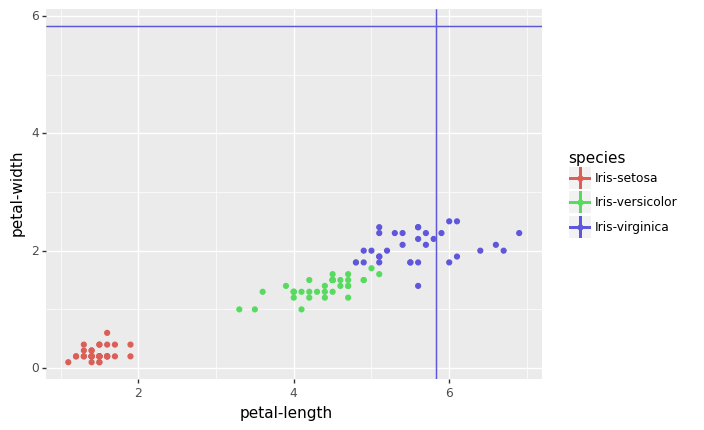

<ggplot: (8757833357553)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))